方針\
$X$エラーについては、$p=[5\times10^{-2},10^{-1}]$を補完して、$p=10^{-4},5\times10^{-4}$を求める。
その後、符合距離の関数として求め直す。
$Z$エラーについては、$p=10^{-4},5\times10^{-4}$から、符合距離の関数として求め直す。

# d1 = 5

In [33]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

### Xエラー

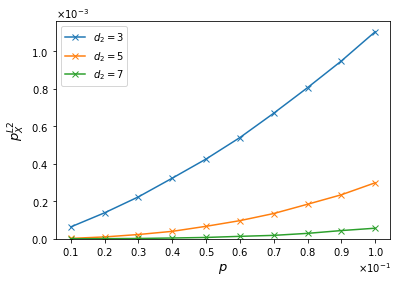

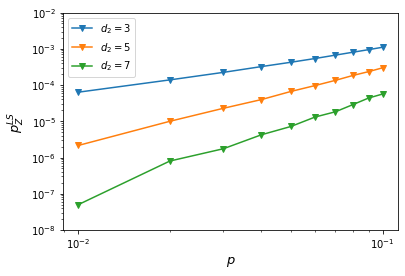

In [34]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=5,eta=1000"
# ファイル名
file2 = "X error,d2=(3,7,2),eta=1000,trials=20000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
data2 = data2.iloc[:,:]
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00000001, 0.01)
ax.legend()

### 線形回帰

d2= 3
p(10^{-4})= [1.92295124e-07]
p(5*10^{-4})= [1.42716447e-06] 

d2= 5
p(10^{-4})= [1.21599558e-10]
p(5*10^{-4})= [3.72937024e-09] 

d2= 7
p(10^{-4})= [9.18349019e-14]
p(5*10^{-4})= [1.03291819e-11] 



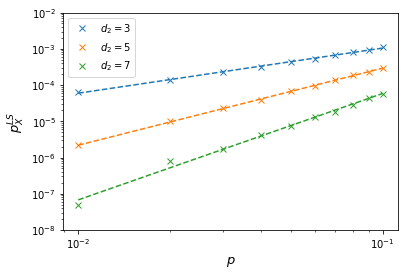

In [36]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

p_list = []
cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print("d2=", str(2*i+3))
        #print("katamuki=", clf.coef_)
        #print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("p(10^{-4})=", 10**clf.predict([[-4]]))
        print("p(5*10^{-4})=", 10**clf.predict([[-4+np.log10(5)]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        print("d2=", str(2*i+3))
        clf.fit(X, Y)
        #print("katamuki=", clf.coef_)
        #print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("p(10^{-4})=", 10**clf.predict([[-4]]))
        print("p(5*10^{-4})=", 10**clf.predict([[-4+np.log10(5)]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
#print(a,10**clf.predict(a.reshape(-1, 1)))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00000001, 0.01)
ax.legend()

[0.0035623] [0.08573124]
[0.0007687] [0.02674655]


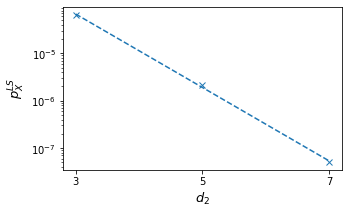

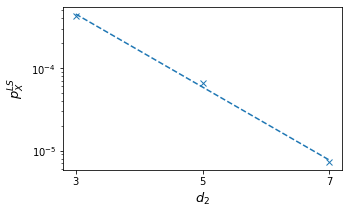

In [37]:
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([data2.iloc[0,0],data2.iloc[1,0],data2.iloc[2,0]])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.set_xlabel(r"$d_2$", fontsize=13)
ax.set_ylabel(r'$p_X^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,5,7], [data2.iloc[0,0],data2.iloc[1,0],data2.iloc[2,0]],marker='x',linewidth=0,color=cm(0))
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.set_yscale("log")

# p=5*10^{-4}
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([data2.iloc[0,4],data2.iloc[1,4],data2.iloc[2,4]])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.set_xlabel(r"$d_2$", fontsize=13)
ax.set_ylabel(r'$p_X^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.plot([3,5,7], [data2.iloc[0,4],data2.iloc[1,4],data2.iloc[2,4]],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0,color=cm(0))
ax.set_yscale("log")

# p=5*10^{-4}

### Zエラー

In [40]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=5,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=400000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
p_list = data2.columns

##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

"""
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L(\rm{S})}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
    print(code_distance_list[i]*(4*5+6+7)/b[0])
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()
"""

'\nfig, ax = plt.subplots()\nfor i in range(len(code_distance_list)):\n    b = np.array(data2.loc[code_distance_list[i]])\n    ax.plot(a, b,marker=\'x\',label=r"$d_{2}=$"+str(code_distance_list[i]))\nax.set_xlabel(r"$p$", fontsize=13)\nax.set_ylabel(r\'$p_Z^{L(\rm{S})}$\', fontsize=13)\nax.set_ylim(0,)\nax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) \nax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))\nax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) \nax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))\nax.set_xticks(a)\nax.legend()\n\nfig, ax = plt.subplots()\nfor i in range(len(code_distance_list)-1):\n    b = np.array(data2.loc[code_distance_list[i]])\n    ax.plot(a, b,marker=\'v\',label=r"$d_{2}=$"+str(code_distance_list[i]))\n    print(code_distance_list[i]*(4*5+6+7)/b[0])\nax.set_xlabel(r"$p$", fontsize=13)\nax.set_ylabel(r\'$p_Z^{LS}$\', fontsize=13)\nax.set_ylim(0,)\nax.xaxis.set_major_formatter(ptick.ScalarFormatter

hokan= [0.00172468]
hokan= [0.00018922]
hokan= [2.0532703e-05]
[0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009 0.001 ] [6.11271222e+09 6.11780719e+09 6.12290641e+09 6.12800988e+09
 6.13311761e+09 6.13822959e+09 6.14334583e+09 6.14846634e+09
 6.15359111e+09 6.15872016e+09]


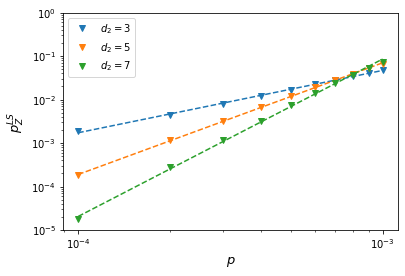

In [41]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

p_list = []
cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        #print("katamuki=", clf.coef_)
        #print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("hokan=", 10**clf.predict([[-4]]))
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        #print("katamuki=", clf.coef_)
        #print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("hokan=", 10**clf.predict([[-4]]))
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
print(a,10**clf.predict(a.reshape(-1, 1)))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()

[0.00104471] [0.20738354]
[0.00014826] [0.03727704]


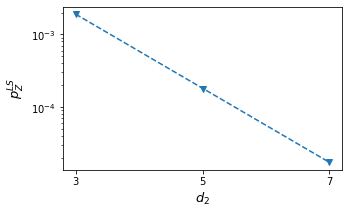

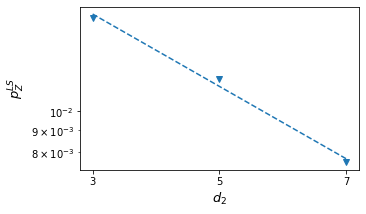

In [42]:
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([data2.iloc[0,0],data2.iloc[1,0],data2.iloc[2,0]])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.set_xlabel(r"$d_2$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,5,7], [data2.iloc[0,0],data2.iloc[1,0],data2.iloc[2,0]],marker='v',linewidth=0,color=cm(0))
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.set_yscale("log")

# p=5*10^{-4}
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([data2.iloc[0,4],data2.iloc[1,4],data2.iloc[2,4]])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.set_xlabel(r"$d_2$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.plot([3,5,7], [data2.iloc[0,4],data2.iloc[1,4],data2.iloc[2,4]],marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0,color=cm(0))
ax.set_yscale("log")
#ax.set_ylim(6*0.001, 2*0.01)